# American Community Survey - California - 2017 Analysis

In this notebook, I will practice conducting statistical tests and visualizing data within Python. 

The data I'm using comes from the 2017 American Community Survey. I am looking at data from the 15 most populous counties in California only. The table I am using is "Selected Characteristics of People at Specified Levels of Poverty in the Past 12 Months." This will allow us to see how poverty levels differ in different counties of California and among different populations.

In [75]:
# Libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

## Data Preparation

Let's import and clean up the data.

In [76]:
# Import data file
raw_data = pd.read_csv('ACS_17_1YR_S1703_with_ann.csv')
metadata = pd.read_csv('ACS_17_1YR_S1703_metadata.csv')

In [77]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Columns: 283 entries, GEO.id to HC04_MOE_VC51
dtypes: object(283)
memory usage: 35.5+ KB


In [78]:
raw_data.head(5)

,GEO.id,GEO.id2,GEO.display-label,HC01_EST_VC01,HC01_MOE_VC01,HC02_EST_VC01,HC02_MOE_VC01,HC03_EST_VC01,HC03_MOE_VC01,HC04_EST_VC01,...,HC04_EST_VC50,HC04_MOE_VC50,HC01_EST_VC51,HC01_MOE_VC51,HC02_EST_VC51,HC02_MOE_VC51,HC03_EST_VC51,HC03_MOE_VC51,HC04_EST_VC51,HC04_MOE_VC51
0,Id,Id2,Geography,Total; Estimate; Population for whom poverty s...,Total; Margin of Error; Population for whom po...,Less than 50 percent of the poverty level; Est...,Less than 50 percent of the poverty level; Mar...,Less than 100 percent of the poverty level; Es...,Less than 100 percent of the poverty level; Ma...,Less than 125 percent of the poverty level; Es...,...,Less than 125 percent of the poverty level; Es...,Less than 125 percent of the poverty level; Ma...,Total; Estimate; WORK STATUS - Population 16 t...,Total; Margin of Error; WORK STATUS - Populati...,Less than 50 percent of the poverty level; Est...,Less than 50 percent of the poverty level; Mar...,Less than 100 percent of the poverty level; Es...,Less than 100 percent of the poverty level; Ma...,Less than 125 percent of the poverty level; Es...,Less than 125 percent of the poverty level; Ma...
1,0500000US06001,06001,"Alameda County, California",1636780,2648,4.4,0.4,9.2,0.5,12.1,...,17.1,1.5,231484,7735,14.8,1.5,24.6,1.5,29.2,1.6
2,0500000US06013,06013,"Contra Costa County, California",1138850,1328,4.2,0.6,9.3,0.9,12.4,...,14.1,1.7,168044,7131,13.6,1.9,22.6,2.8,28.2,3.0
3,0500000US06019,06019,"Fresno County, California",972580,1778,9.0,0.9,21.1,1.3,27.9,...,32.9,2.5,177421,6349,19.1,2.3,36.6,2.4,43.9,2.5
4,0500000US06029,06029,"Kern County, California",860951,2581,9.8,1.0,21.4,1.6,28.9,...,29.6,3.0,179140,7436,19.4,2.3,35.5,3.0,44.9,3.2


Our file has nonintuitive column names and a descriptor row. This is a problem because Pandas is storing every column as an object, since every column has a string value. 

We could write some code to fix that here in our notebook, but it will be faster to save a DataFrame without the string descriptor row to our computer and then reimport it, so Pandas can automatically read it correctly. 

While we're at it, let's change the county names to be shorter so we don't have to keep manually doing this later on.

In [106]:
fixed_data = raw_data[raw_data['GEO.id2'] != 'Id2'].reset_index()
fixed_data['GEO.display-label'] = fixed_data['GEO.display-label'].apply(lambda x: x.split(' County')[0])
fixed_data.to_csv('ACS_17_1YR_S1703_FIXED.csv')
data = pd.read_csv('ACS_17_1YR_S1703_FIXED.csv')
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Columns: 285 entries, Unnamed: 0 to HC04_MOE_VC51
dtypes: float64(210), int64(73), object(2)
memory usage: 33.5+ KB


,Unnamed: 0,index,GEO.id,GEO.id2,GEO.display-label,HC01_EST_VC01,HC01_MOE_VC01,HC02_EST_VC01,HC02_MOE_VC01,HC03_EST_VC01,...,HC04_EST_VC50,HC04_MOE_VC50,HC01_EST_VC51,HC01_MOE_VC51,HC02_EST_VC51,HC02_MOE_VC51,HC03_EST_VC51,HC03_MOE_VC51,HC04_EST_VC51,HC04_MOE_VC51
0,0,1,0500000US06001,6001,Alameda,1636780,2648,4.4,0.4,9.2,...,17.1,1.5,231484,7735,14.8,1.5,24.6,1.5,29.2,1.6
1,1,2,0500000US06013,6013,Contra Costa,1138850,1328,4.2,0.6,9.3,...,14.1,1.7,168044,7131,13.6,1.9,22.6,2.8,28.2,3.0
2,2,3,0500000US06019,6019,Fresno,972580,1778,9.0,0.9,21.1,...,32.9,2.5,177421,6349,19.1,2.3,36.6,2.4,43.9,2.5
3,3,4,0500000US06029,6029,Kern,860951,2581,9.8,1.0,21.4,...,29.6,3.0,179140,7436,19.4,2.3,35.5,3.0,44.9,3.2
4,4,5,0500000US06037,6037,Los Angeles,10015695,5187,6.1,0.2,14.9,...,21.3,0.6,1713389,17864,17.3,0.7,30.6,0.8,37.3,0.8


Fixed! Let's move on.

This is a very large file with many variables. We only want to analyze poverty by county, sex, and disability. Let's separate our DataFrame into smaller DataFrames with descriptive column names to make our analysis easier. 

### Poverty by County

In [107]:
data_county = data[['GEO.id2', 'GEO.display-label', 'HC01_EST_VC01', 'HC01_MOE_VC01', 'HC02_EST_VC01', 'HC02_MOE_VC01', 'HC03_EST_VC01', 'HC03_MOE_VC01', 'HC04_EST_VC01', 'HC04_MOE_VC01']]
data_county.columns = ['county_id', 'county', 'county_population', 'county_population_error', 'county_50_poverty', 'county_50_poverty_error', 'county_100_poverty', 'county_100_poverty_error', 'county_125_poverty', 'county_125_poverty_error']
data_county

,county_id,county,county_population,county_population_error,county_50_poverty,county_50_poverty_error,county_100_poverty,county_100_poverty_error,county_125_poverty,county_125_poverty_error
0,6001,Alameda,1636780,2648,4.4,0.4,9.2,0.5,12.1,0.7
1,6013,Contra Costa,1138850,1328,4.2,0.6,9.3,0.9,12.4,1.1
2,6019,Fresno,972580,1778,9.0,0.9,21.1,1.3,27.9,1.5
3,6029,Kern,860951,2581,9.8,1.0,21.4,1.6,28.9,1.8
4,6037,Los Angeles,10015695,5187,6.1,0.2,14.9,0.3,20.0,0.4
5,6059,Orange,3154479,3139,4.9,0.3,11.5,0.5,15.3,0.6
6,6065,Riverside,2385745,4745,6.0,0.5,12.9,0.7,17.8,0.9
7,6067,Sacramento,1509927,2925,5.9,0.6,14.1,0.8,19.3,1.0
8,6071,San Bernardino,2093857,5512,6.8,0.5,16.2,0.8,21.7,1.0
9,6073,San Diego,3256674,4245,5.4,0.4,11.8,0.6,15.6,0.7


### Poverty by Sex

In [108]:
data_sex = data[['GEO.id2', 'GEO.display-label', 'HC01_EST_VC01', 'HC01_EST_VC03', 'HC01_MOE_VC03', 'HC02_EST_VC03', 'HC02_MOE_VC03', 'HC03_EST_VC03', 'HC03_MOE_VC03', 'HC04_EST_VC03', 'HC04_MOE_VC03', 'HC01_EST_VC04', 'HC01_MOE_VC04', 'HC02_EST_VC04', 'HC02_MOE_VC04', 'HC03_EST_VC04', 'HC03_MOE_VC04', 'HC04_EST_VC04', 'HC04_MOE_VC04']]
data_sex.columns = ['county_id', 'county', 'county_population', 'male_population', 'male_population_error', 'male_50_poverty', 'male_50_poverty_error', 'male_100_poverty', 'male_100_poverty_error', 'male_125_poverty', 'male_125_poverty_error', 'female_population', 'female_population_error', 'female_50_poverty', 'female_50_poverty_error', 'female_100_poverty', 'female_100_poverty_error', 'female_125_poverty', 'female_125_poverty_error']
data_sex

,county_id,county,county_population,male_population,male_population_error,male_50_poverty,male_50_poverty_error,male_100_poverty,male_100_poverty_error,male_125_poverty,male_125_poverty_error,female_population,female_population_error,female_50_poverty,female_50_poverty_error,female_100_poverty,female_100_poverty_error,female_125_poverty,female_125_poverty_error
0,6001,Alameda,1636780,805980,1611,3.8,0.5,8.1,0.5,11.0,0.7,830800,1839,5.0,0.5,10.3,0.7,13.3,0.8
1,6013,Contra Costa,1138850,556457,1047,3.6,0.6,8.4,0.8,11.4,1.1,582393,975,4.7,0.7,10.1,1.2,13.4,1.3
2,6019,Fresno,972580,482307,1542,7.8,1.0,19.5,1.4,26.4,1.7,490273,1401,10.2,1.1,22.7,1.5,29.3,1.5
3,6029,Kern,860951,429554,2204,9.1,1.2,19.6,1.7,26.8,1.9,431397,1219,10.5,1.2,23.3,1.9,31.0,2.1
4,6037,Los Angeles,10015695,4932694,3676,5.5,0.3,13.7,0.3,18.7,0.4,5083001,3454,6.7,0.3,16.0,0.4,21.3,0.4
5,6059,Orange,3154479,1557292,2183,4.5,0.4,10.5,0.6,14.2,0.7,1597187,1981,5.3,0.4,12.4,0.6,16.4,0.6
6,6065,Riverside,2385745,1183107,2722,5.0,0.4,11.1,0.7,15.7,0.9,1202638,3627,6.9,0.6,14.6,0.8,19.9,1.0
7,6067,Sacramento,1509927,734664,2227,5.7,0.6,13.9,1.0,18.9,1.2,775263,1893,6.1,0.7,14.3,1.0,19.7,1.1
8,6071,San Bernardino,2093857,1025156,4020,6.1,0.6,14.8,1.0,20.0,1.2,1068701,4017,7.4,0.6,17.4,0.9,23.3,1.0
9,6073,San Diego,3256674,1621988,3295,5.1,0.5,11.1,0.6,14.7,0.8,1634686,3066,5.8,0.5,12.6,0.7,16.6,0.7


### Poverty by Disability

In [109]:
data_disability = data[['GEO.id2', 'GEO.display-label', 'HC01_EST_VC01', 'HC01_EST_VC44', 'HC01_MOE_VC44', 'HC02_EST_VC44', 'HC02_MOE_VC44', 'HC03_EST_VC44', 'HC03_MOE_VC44', 'HC04_EST_VC44', 'HC04_MOE_VC44']]
data_disability.columns = ['county_id', 'county', 'county_population', 'disabled_population', 'disabled_population_error', 'disabled_50_poverty', 'disabled_50_poverty_error', 'disabled_100_poverty', 'disabled_100_poverty_error', 'disabled_125_poverty', 'disabled_125_poverty_error']
data_disability

,county_id,county,county_population,disabled_population,disabled_population_error,disabled_50_poverty,disabled_50_poverty_error,disabled_100_poverty,disabled_100_poverty_error,disabled_125_poverty,disabled_125_poverty_error
0,6001,Alameda,1636780,149018,5505,6.3,1.1,19.0,1.8,24.3,1.9
1,6013,Contra Costa,1138850,132811,6251,7.6,1.8,16.4,2.5,20.7,2.7
2,6019,Fresno,972580,141769,6634,9.3,1.6,25.5,2.3,33.8,2.6
3,6029,Kern,860951,100767,5662,13.2,2.3,29.3,3.2,37.3,3.4
4,6037,Los Angeles,10015695,984672,15616,7.3,0.5,20.9,0.7,28.5,0.8
5,6059,Orange,3154479,272245,7216,5.8,0.7,14.4,1.3,20.2,1.4
6,6065,Riverside,2385745,280885,10078,7.4,0.9,17.4,1.5,23.0,1.6
7,6067,Sacramento,1509927,177711,7531,7.4,1.0,19.2,1.5,25.2,1.6
8,6071,San Bernardino,2093857,241906,7532,7.4,1.2,19.6,1.8,25.8,1.9
9,6073,San Diego,3256674,309681,9591,6.1,0.8,15.7,1.2,20.9,1.3


## Analysis and Visualization

Let's begin analyzing and visualizing our data

### Poverty by County

We can start by visualizing the total population sizes of the 15 California counties included in our dataset. We'll do this the hard way with Matplotlib and the easy way with Seaborn. 

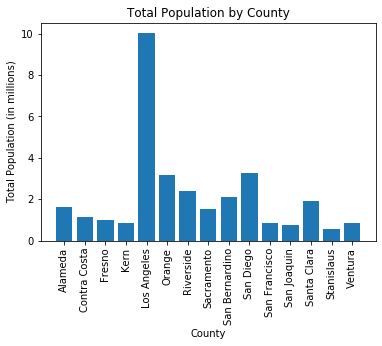

In [118]:
county_x_values = range(len(data_county.county_population))

ax = plt.subplot()

plt.bar(county_x_values, data_county.county_population)

plt.xlabel('County')
plt.ylabel('Total Population (in millions)')
plt.title('Total Population by County')

ax.set_xticks(county_x_values)
ax.set_xticklabels(data_county.county, rotation = 90)
ax.set_yticks([0, 2000000, 4000000, 6000000, 8000000, 10000000])
ax.set_yticklabels([0, 2, 4, 6, 8, 10])


plt.show()